<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HAND ON LAB EXERCICES

In [12]:
import pandas as pd
import numpy as np

n = 2000
data = {
    'EmployeeID': np.arange(1, n + 1),
    'FirstName': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eve'], size=n),
    'LastName': np.random.choice(['Smith', 'Jones', 'Williams', 'Brown', 'Davis'], size=n),
    'Age': np.random.randint(20, 65, size=n),
    'Department': np.random.choice(['Sales', 'Marketing', 'Engineering', 'HR', 'Finance'], size=n),
    'Salary': np.random.randint(30000, 100000, size=n),
    'StartDate': pd.to_datetime(np.random.choice(pd.date_range('2020-01-01', '2023-12-31'), size=n))
}
employees_df = pd.DataFrame(data)
print(employees_df.head())


   EmployeeID FirstName LastName  Age   Department  Salary  StartDate
0           1       Bob    Brown   40  Engineering   73227 2021-02-01
1           2       Eve    Jones   64    Marketing   54761 2023-08-15
2           3   Charlie    Brown   20  Engineering   69266 2022-04-18
3           4     Alice    Jones   29      Finance   98913 2020-08-05
4           5       Eve    Brown   37           HR   78531 2021-03-28


samples extraction

In [13]:
import pandas as pd
import numpy as np
sample1 = np.random.choice(employees_df['Salary'], size=25, replace=False)
print(sample1)
sample2 = np.random.choice(employees_df['Salary'], size=25, replace=False)
print(sample2)

[32285 49021 77338 89670 92124 65658 61816 47301 88119 97375 58553 69522
 34991 78856 77670 69297 71245 64246 94171 69477 95724 88250 71813 84463
 40135]
[31946 60457 87812 83579 39193 73783 46280 91884 79693 38380 60646 56355
 82192 68911 90067 93845 61258 91774 54168 79752 49431 65947 90030 54685
 60313]


# ***t-test***

t-statistic: 0.5743635876110247
p-value: 0.5684039132418597
Fail to reject the null hypothesis
Mean of sample 1: 70764.8
Mean of sample 2: 67695.24


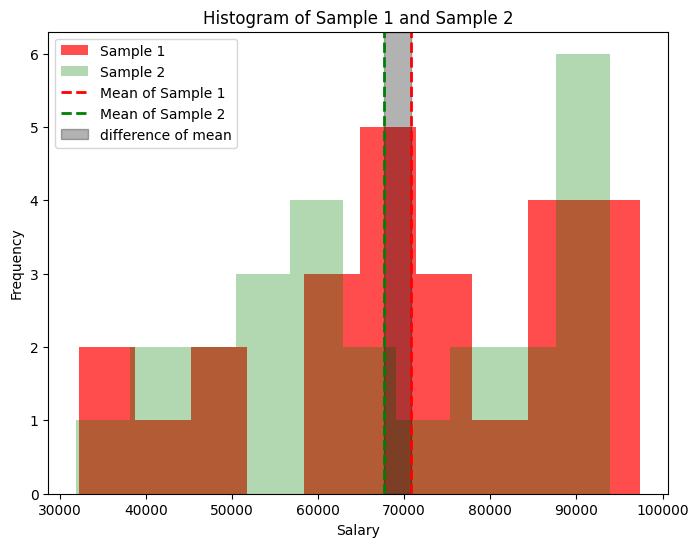

In [20]:
import matplotlib.pyplot as plt
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(sample1, sample2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
print("Mean of sample 1:", mean1)
print("Mean of sample 2:", mean2)
plt.figure(figsize=(8, 6))
plt.hist(sample1, bins=10, alpha=0.7, label='Sample 1',color="red")
plt.hist(sample2, bins=10, alpha=0.3, label='Sample 2',color="green")
plt.axvline(mean1, color='r', linestyle='dashed', linewidth=2, label='Mean of Sample 1')
plt.axvline(mean2, color='g', linestyle='dashed', linewidth=2, label='Mean of Sample 2')
plt.axvspan(mean1, mean2, alpha=0.3, color='k', label='difference of mean')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Sample 1 and Sample 2')
plt.legend()
plt.show()

there is no statistically significant difference between the means of the two samples. andifference is likely due to chance

ANOVA

ANOVA
F-statistic: 2.7253317662647887
p-value: 0.06569908977515011
Fail to reject the null hypothesis


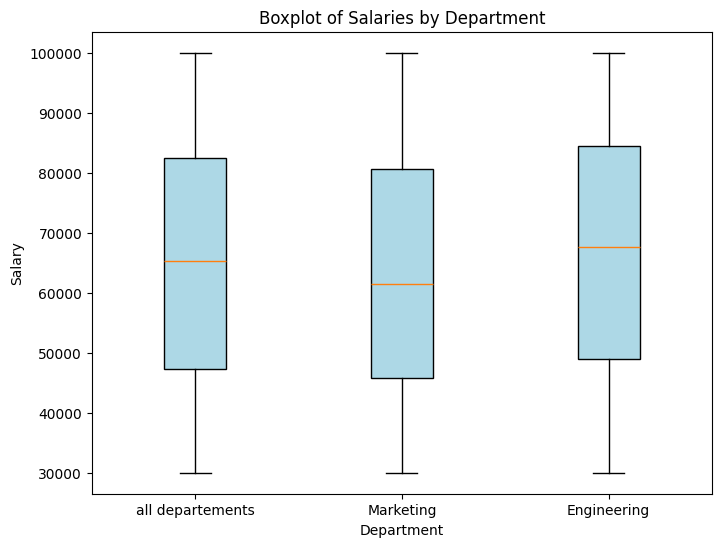

In [32]:
print("ANOVA")
import scipy.stats as stats
group1 = employees_df['Salary']
group2 = employees_df[employees_df['Department'] == 'Marketing']['Salary']
group3 = employees_df[employees_df['Department'] == 'Engineering']['Salary']
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
plt.figure(figsize=(8, 6))
plt.boxplot([group1, group2, group3], labels=['all departements', 'Marketing', 'Engineering'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Boxplot of Salaries by Department')
plt.show()


the observed differences in means are not statistically significant

Z-test

Z-test
Z-statistic: 0.3102160594776181
p-value: 0.756396658844328
Fail to reject the null hypothesis


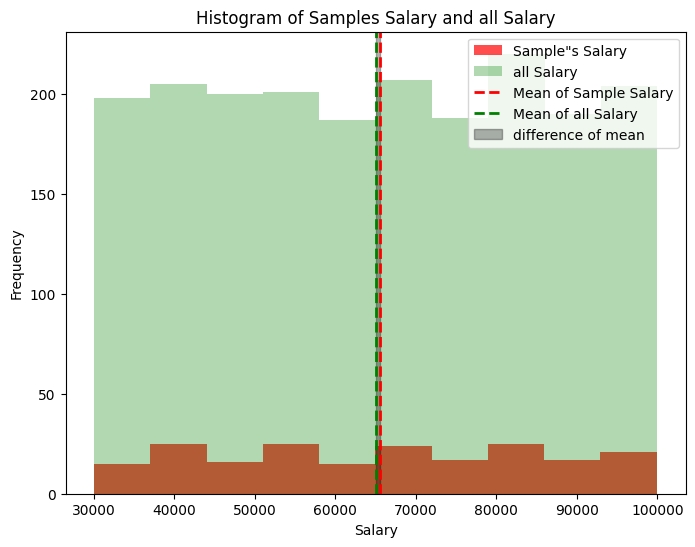

In [38]:
print("Z-test")
import scipy.stats as stats
mean_all = np.mean(employees_df['Salary'])
std_all = np.std(employees_df['Salary'])
bigsample=np.random.choice(employees_df['Salary'], size=200, replace=False)
mean_sample = np.mean(bigsample)
std_sample = np.std(bigsample)
z_statistic = (mean_sample - mean_all) / (std_all / np.sqrt(len(bigsample)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
print("Z-statistic:", z_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
plt.figure(figsize=(8, 6))
plt.hist(bigsample, bins=10, alpha=0.7, label='Sample"s Salary',color="red")
plt.hist(employees_df['Salary'], bins=10, alpha=0.3, label='all Salary',color="green")
plt.axvline(mean_sample, color='r', linestyle='dashed', linewidth=2, label='Mean of Sample Salary')
plt.axvline(mean_all, color='g', linestyle='dashed', linewidth=2, label='Mean of all Salary')
plt.axvspan(mean_all, mean_sample, alpha=0.3, color='k', label='difference of mean')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Samples Salary and all Salary')
plt.legend()
plt.show()


the difference in means is not statistically significant

# ***EXERCICE***

T-TEST

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
t-statistic: 38.007526953730185
p-value: 1.742647490389166e-37
Mean of sample 1: 4.292
Mean of sample 2: 1.44
Reject the null hypothesis


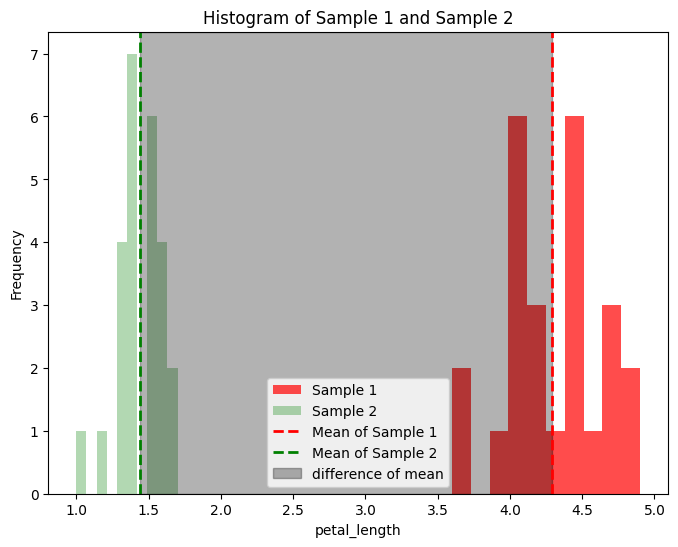

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
iris=sns.load_dataset("iris")
print(iris.head())

versicolor_petal_length = iris[iris["species"] == "versicolor"]["petal_length"]
sample1 = np.random.choice(versicolor_petal_length, size=25, replace=False)

setosa_petal_length = iris[iris["species"] == "setosa"]["petal_length"]
sample2 = np.random.choice(setosa_petal_length, size=25, replace=False)
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
print("Mean of sample 1:", mean1)
print("Mean of sample 2:", mean2)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
plt.figure(figsize=(8, 6))
plt.hist(sample1, bins=10, alpha=0.7, label='Sample 1',color="red")
plt.hist(sample2, bins=10, alpha=0.3, label='Sample 2',color="green")
plt.axvline(mean1, color='r', linestyle='dashed', linewidth=2, label='Mean of Sample 1')
plt.axvline(mean2, color='g', linestyle='dashed', linewidth=2, label='Mean of Sample 2')
plt.axvspan(mean1, mean2, alpha=0.3, color='k', label='difference of mean')
plt.xlabel('petal_length')
plt.ylabel('Frequency')
plt.title('Histogram of Sample 1 and Sample 2')
plt.legend()
plt.show()



means are not equal

# Z-TEST

5.843333333333334
Z-statistic: 2.7855588731248506e-05
p-value: 0.999977774455822
Fail to reject the null hypothesis


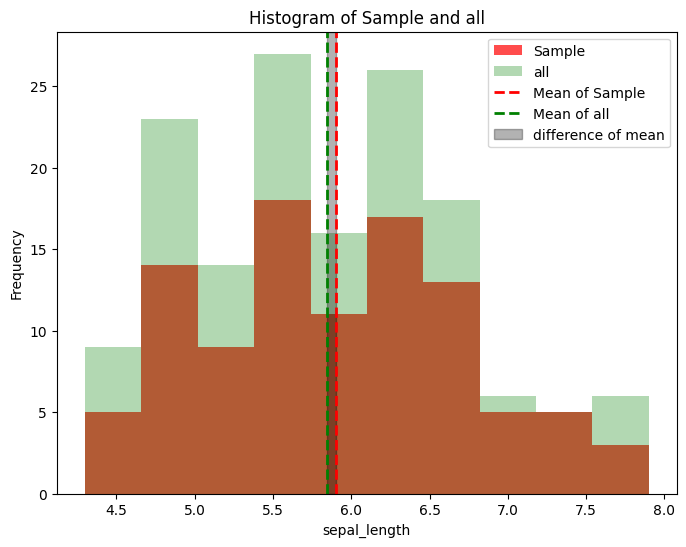

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
mean=iris.sepal_length.mean()
print(mean)


sample=np.random.choice(iris['sepal_length'], size=100, replace=False)
mean_sample = np.mean(sample)
std_sample = np.std(sample)
z_statistic = (mean_sample - mean) / (std_all / np.sqrt(len(sample)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
print("Z-statistic:", z_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=10, alpha=0.7, label='Sample',color="red")
plt.hist(iris['sepal_length'], bins=10, alpha=0.3, label='all',color="green")
plt.axvline(mean_sample, color='r', linestyle='dashed', linewidth=2, label='Mean of Sample')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=2, label='Mean of all')
plt.axvspan(mean, mean_sample, alpha=0.3, color='k', label='difference of mean')
plt.xlabel('sepal_length')
plt.ylabel('Frequency')
plt.title('Histogram of Sample and all')
plt.legend()
plt.show()


# ANOVA

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
F-statistic: 960.007146801809
p-value: 4.169445839443116e-85
Reject the null hypothesis


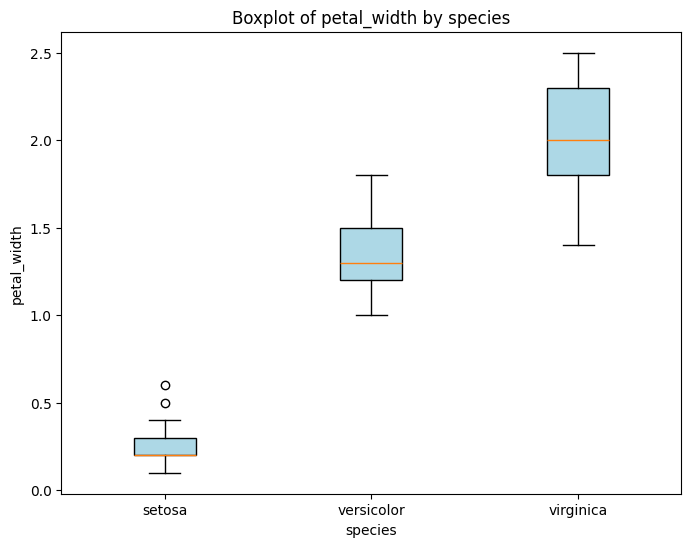

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
iris=sns.load_dataset("iris")
print(iris.head())
group1=iris[iris["species"]=="setosa"]["petal_width"]
group2=iris[iris["species"]=="versicolor"]["petal_width"]
group3=iris[iris["species"]=="virginica"]["petal_width"]
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
plt.figure(figsize=(8, 6))
plt.boxplot([group1, group2, group3], labels=['setosa', 'versicolor', 'virginica'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('species')
plt.ylabel('petal_width')
plt.title('Boxplot of petal_width by species')
plt.show()



ALl means are not equal

Correlation/Regression

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Correlation coefficient: 0.8717537758865831
p-value: 1.0386674194498827e-47
Reject the null hypothesis


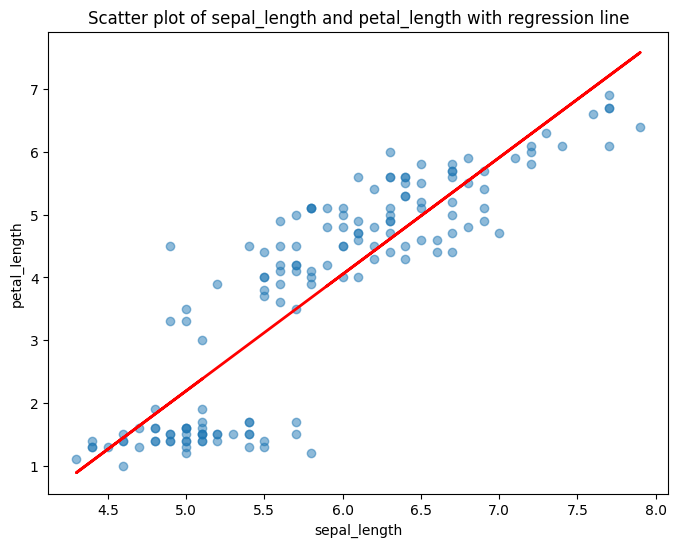

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
iris=sns.load_dataset("iris")
print(iris.head())
correlation, p_value = stats.pearsonr(iris['sepal_length'], iris['petal_length'])
print("Correlation coefficient:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



regression_model = np.polyfit(iris['sepal_length'], iris['petal_length'], 1)
regression_line = np.poly1d(regression_model)(iris['sepal_length'])
plt.figure(figsize=(8, 6))
plt.scatter(iris['sepal_length'], iris['petal_length'], alpha=0.5)
plt.plot(iris['sepal_length'], regression_line, color='red', linewidth=2)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Scatter plot of sepal_length and petal_length with regression line')
plt.show()


Correlation Coefficient (r): 0.8717537758865831

This value suggests a strong positive correlation between the two variables. As sepal length increases, petal length tends to increase as well.
we reject null hypothesis(it states that there is no correlation)